<a href="https://colab.research.google.com/github/mikhail-mat/mit-ocw_hands-on-deep-learning/blob/main/CNN_Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
keras.utils.set_random_seed(42)

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [23]:
input = keras.Input(shape=X_train.shape[1:], name='Input')

# convolutional layer followed by a pooling layer
x = keras.layers.Conv2D(64,
                        kernel_size=(2,2),
                        activation='relu',
                        name='Conv_1')(input)
x = keras.layers.MaxPool2D()(x)

# convolutional layer followed by a pooling layer
x = keras.layers.Conv2D(64,
                        kernel_size=(2,2),
                        activation='relu',
                        name='Conv_2')(x)
x = keras.layers.MaxPool2D()(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu', name='Dense_1')(x)
output = keras.layers.Dense(10, activation='softmax', name='Output')(x)

model = keras.Model(input, output)


In [17]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_1 (Conv2D)                 │ (None, 27, 27, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 12, 12, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 609,418 (2.32 MB)

 Trainable params: 609,418 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = model.fit(X_train,
          y_train,
          epochs=6,
          batch_size=64,
          validation_split=0.2)

Epoch 1/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7653 - loss: 0.6577 - val_accuracy: 0.8799 - val_loss: 0.3384
Epoch 2/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8827 - loss: 0.3260 - val_accuracy: 0.8934 - val_loss: 0.2910
Epoch 3/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9002 - loss: 0.2731 - val_accuracy: 0.9017 - val_loss: 0.2680
Epoch 4/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9128 - loss: 0.2354 - val_accuracy: 0.9067 - val_loss: 0.2548
Epoch 5/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9252 - loss: 0.2047 - val_accuracy: 0.9092 - val_loss: 0.2565
Epoch 6/6
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9354 - loss: 0.1771 - val_accuracy: 0.9095 - val_loss: 0.2603


In [10]:
def plot_loss(history):
  history_dict = history.history
  epochs = range(1, len(history_dict['loss'])+1)
  plt.scatter(epochs, history_dict['loss'], label='Training loss')
  plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
  plt.title('Training vs validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_accuracy(history):
  history_dict = history.history
  epochs = range(1, len(history_dict['loss'])+1)
  plt.scatter(epochs, history_dict['accuracy'], label='Training accuracy')
  plt.plot(epochs, history_dict['val_accuracy'], label='Validation accuracy')
  plt.title('Training vs validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

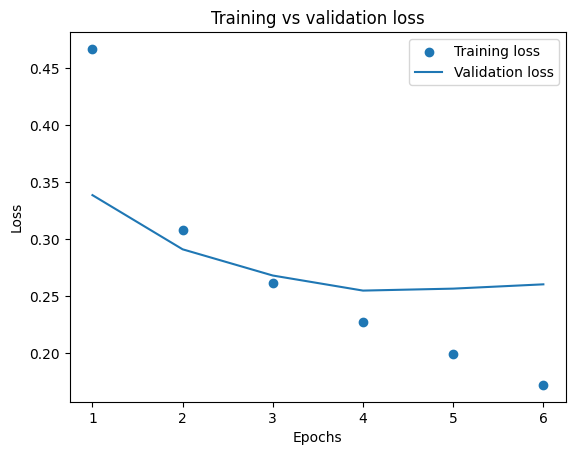

In [26]:
plot_loss(history)

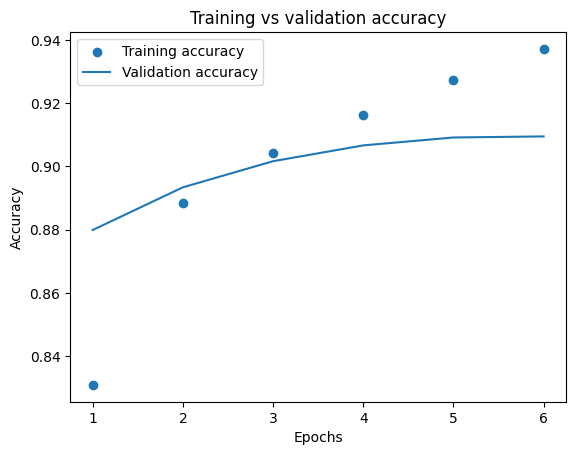

In [27]:
plot_accuracy(history)

In [28]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9045 - loss: 0.2786


[0.2725096344947815, 0.906000018119812]